In [2]:
import nltk
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from docx import Document

In [30]:
import nltk
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from docx import Document
import joblib

In [2]:
doc = Document('C:\\Users\\Raimundo\\Videos\\NLP\\Fala por entrevistado word.docx')
paragraphs = [paragraph.text for paragraph in doc.paragraphs]
text = ""
for paragraph in doc.paragraphs:
    text += paragraph.text + '\n'

# Print the second word
print(text.split()[1])


*Entrv_1


In [130]:
# Read the document
doc = Document('C:\\Users\\Raimundo\\Videos\\NLP\\Fala por entrevistado word.docx')

# Extract text from the document
text = '\n'.join([paragraph.text for paragraph in doc.paragraphs])

# Split the text into interviews based on the pattern '**** *Entrv_'
interview_texts = text.split('**** *Entrv_')[1:]

print(interview_texts)

['1\t\nBusca por inovação, liberdade criativa e potencial de crescimento rápido. A ideia surgiu ao observar problemas ou lacunas no mercado que precisam de solução e criar um produto/serviço para resolvê-los.\tCom certeza. Principalmente voltado ao turismo\tcreio que a falta de atenção ao cliente seja crucial e o ambiente em que está inserido.\tCreio que a falta de atenção ao cliente seja crucial e o ambiente em que está inserido.\tCom certeza sim. Não ter uma estratégia de marketing eficaz para alcançar o público-alvo e não comunicar de maneira adequada o valor do produto/serviço.\tA incerteza e o risco, formar uma equipe capacitada e a mentalidade a médio e longo prazo\tlacunas de mercado\tajuda de amigos\tcreio que seria uma junção de todos\tSempre há dificuldades de inovação. Mercado se movimenta muito rápido e é difícil acompanhar isso\tLiderança e visão dos envolvidos\tCompetição acirrada\tadministração e contabilidade. validação de ideia, modelo de negócios\tcreio que inovação, 

In [124]:
# Stopwords em português:

#nltk.download('stopwords')

# Get NLTK's Portuguese stopwords
nltk_stopwords = nltk.corpus.stopwords.words('portuguese')

# Generate a list of strings for numbers 1 to 50
number_strings = [str(i) for i in range(1, 2024)]

# Your existing custom stopwords
custom_stopwords = [
    "sim", "ter", "pode", "acredito", "sempre", "falta", "parte", "toda", "muita", "09", "08"
]

# Include the number strings in custom stopwords
custom_stopwords += number_strings

# Combine NLTK's stopwords and your custom stopwords
stopwords = nltk_stopwords + custom_stopwords


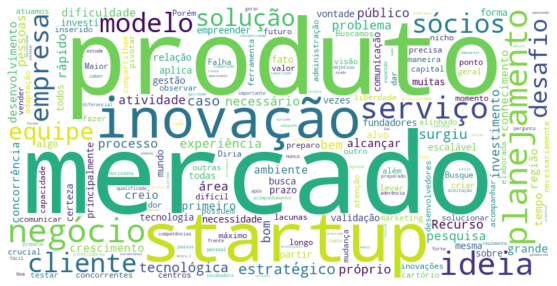

In [125]:

# Create the Word Cloud with custom stopwords
word_cloud = WordCloud(
    collocations=False,
    background_color='white',
    width=800,
    height=400,
    stopwords=stopwords  # Use your custom stopwords set
).generate(text)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Save the Word Cloud image
#word_cloud.to_file('word_cloud.png')


In [156]:
# Use TF-IDF Vectorizer to convert text to numerical vectors
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords)
tfidf_matrix = tfidf_vectorizer.fit_transform(interview_texts)
print(f"n_samples: {tfidf_matrix.shape[0]}, n_features: {tfidf_matrix.shape[1]}")

n_samples: 12, n_features: 599


In [157]:
# Perform KMeans clustering
kmeans = KMeans(
    n_clusters=4,
    max_iter=100,
    n_init=3,
).fit(tfidf_matrix)


In [158]:
# Reduce dimensions for visualization
svd = TruncatedSVD(n_components=2)
tfidf_matrix_svd = svd.fit_transform(tfidf_matrix)

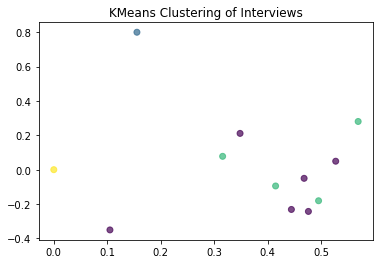

In [159]:
# Plot the clustered interviews
plt.scatter(tfidf_matrix_svd[:, 0], tfidf_matrix_svd[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.7)
plt.title('KMeans Clustering of Interviews')
plt.show()

In [160]:
# Extract the most common words in each cluster
def get_top_words_in_cluster(cluster_id, terms, order_centroids, top_n=10):
    top_words = [terms[ind] for ind in order_centroids[cluster_id, :top_n]]
    return top_words

order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = np.array(tfidf_vectorizer.get_feature_names_out())

In [161]:
# Display most common words in each cluster
for i in range(4):
    top_words = get_top_words_in_cluster(i, terms, order_centroids)
    print(f"Cluster {i + 1} - Top words: {', '.join(top_words)}")

Cluster 1 - Top words: mercado, planejamento, inovação, produto, estratégico, cliente, bom, experiência, serviço, próprio
Cluster 2 - Top words: sócios, complementem, horizonte, amplie, objetivos, precificação, ajude, competências, busque, alcançar
Cluster 3 - Top words: startup, produto, caso, mercado, aplica, negócio, investi, desenvolvimento, conhecimento, processo
Cluster 4 - Top words: clareza, queria, colaborando, coisas, otimista, redor, vida, forte, favor, elaborada


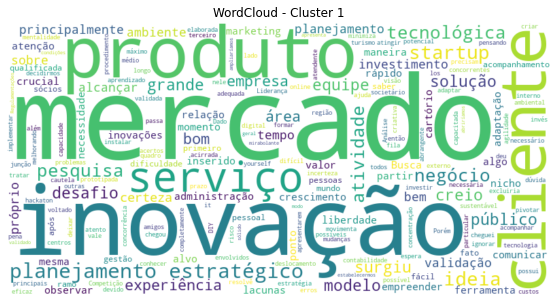

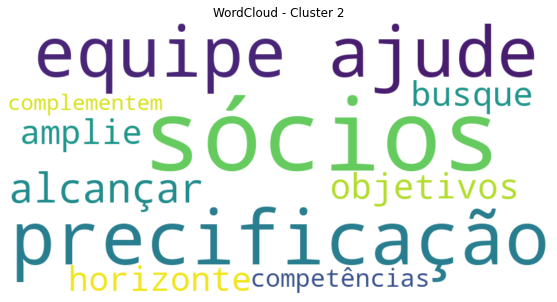

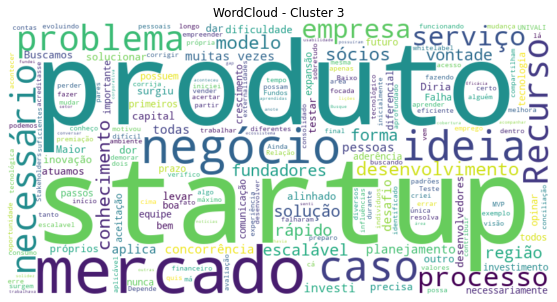

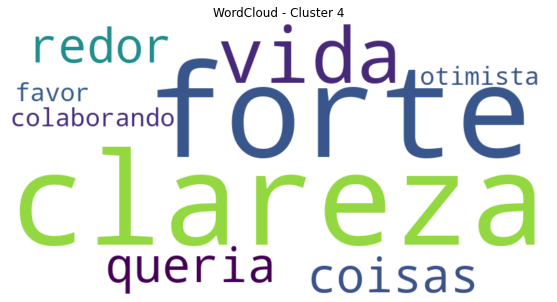

In [163]:
# WordCloud for each cluster
for i in range(4):
    cluster_text = ' '.join([interview_texts[j] for j in range(len(kmeans.labels_)) if kmeans.labels_[j] == i])
    wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=800, height=400).generate(cluster_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud - Cluster {i + 1}')
    plt.show()

In [132]:
from sklearn.cluster import KMeans

for seed in range(5):
    kmeans = KMeans(
        n_clusters=3,
        max_iter=100,
        n_init=1,
        random_state=seed,
    ).fit(tfidf_matrix)
    cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
    print(f"Number of elements assigned to each cluster: {cluster_sizes}")

Number of elements assigned to each cluster: [9 1 2]
Number of elements assigned to each cluster: [9 1 2]
Number of elements assigned to each cluster: [ 1  1 10]
Number of elements assigned to each cluster: [2 2 8]
Number of elements assigned to each cluster: [2 7 3]


In [147]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

lsa = make_pipeline(TruncatedSVD(n_components=50), Normalizer(copy=False))
t0 = time()
X_lsa = lsa.fit_transform(tfidf_matrix)
explained_variance = lsa[0].explained_variance_ratio_.sum()

print(f"LSA done in {time() - t0:.3f} s")
print(f"Explained variance of the SVD step: {explained_variance * 100:.1f}%")

LSA done in 0.026 s
Explained variance of the SVD step: 100.0%


In [148]:
kmeans = KMeans(
    n_clusters=4,
    max_iter=100,
    n_init=3,
).fit(tfidf_matrix)
cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
print(f"Number of elements assigned to each cluster: {cluster_sizes}")

Number of elements assigned to each cluster: [1 3 1 7]


In [149]:
original_space_centroids = lsa[0].transform(kmeans.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(4):
    print(f"Cluster {i}: ", end="")
    for ind in order_centroids[i, :10]:
        print(f"{terms[ind]} ", end="")
    print()

Cluster 0: acertar abrangente abrir achar acertos acompanhamento acesso acelerado aceitação acirrada 
Cluster 1: abriríamos abrangente acirrada acesso acelerado acertar aceitação acertos achar acompanhamento 
Cluster 2: acelerado aceleradoras aceitação acertar abriríamos acertos abrangente achar acompanhamento acesso 
Cluster 3: abrangente aceleradoras aceitação abrir acesso acompanhamento achar acertos acelerado acirrada 


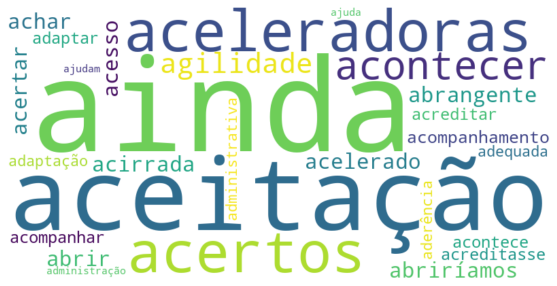

In [87]:
# Add cluster labels to the WordCloud
word_cloud = WordCloud(
    collocations=False,
    background_color='white',
    width=800,
    height=400,
    stopwords=stopwords
).generate_from_frequencies(dict(zip(tfidf_vectorizer.get_feature_names_out(), kmeans.labels_)))


# Display the Word Cloud with clusters
plt.figure(figsize=(10, 5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [20]:
import numpy as np

from sklearn.datasets import fetch_20newsgroups

categories = [
    "alt.atheism",
    "talk.religion.misc",
    "comp.graphics",
    "sci.space",
]

dataset = fetch_20newsgroups(
    remove=("headers", "footers", "quotes"),
    subset="all",
    categories=categories,
    shuffle=True,
    random_state=42,
)

labels = dataset.target
unique_labels, category_sizes = np.unique(labels, return_counts=True)
true_k = unique_labels.shape[0]

print(f"{len(dataset.data)} documents - {true_k} categories")

3387 documents - 4 categories


In [21]:
from collections import defaultdict
from time import time

from sklearn import metrics

evaluations = []
evaluations_std = []


def fit_and_evaluate(km, X, name=None, n_runs=5):
    name = km.__class__.__name__ if name is None else name

    train_times = []
    scores = defaultdict(list)
    for seed in range(n_runs):
        km.set_params(random_state=seed)
        t0 = time()
        km.fit(X)
        train_times.append(time() - t0)
        scores["Homogeneity"].append(metrics.homogeneity_score(labels, km.labels_))
        scores["Completeness"].append(metrics.completeness_score(labels, km.labels_))
        scores["V-measure"].append(metrics.v_measure_score(labels, km.labels_))
        scores["Adjusted Rand-Index"].append(
            metrics.adjusted_rand_score(labels, km.labels_)
        )
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, km.labels_, sample_size=2000)
        )
    train_times = np.asarray(train_times)

    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_df=0.5,
    min_df=5,
    stop_words="english",
)
t0 = time()
X_tfidf = vectorizer.fit_transform(dataset.data)

print(f"vectorization done in {time() - t0:.3f} s")
print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")

vectorization done in 0.491 s
n_samples: 3387, n_features: 7929


In [23]:
from sklearn.cluster import KMeans

for seed in range(5):
    kmeans = KMeans(
        n_clusters=true_k,
        max_iter=100,
        n_init=1,
        random_state=seed,
    ).fit(X_tfidf)
    cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
    print(f"Number of elements assigned to each cluster: {cluster_sizes}")
print()
print(
    "True number of documents in each category according to the class labels: "
    f"{category_sizes}"
)

Number of elements assigned to each cluster: [   1    1 3384    1]
Number of elements assigned to each cluster: [1597  732  233  825]
Number of elements assigned to each cluster: [2004  446  646  291]
Number of elements assigned to each cluster: [1695  649  446  597]
Number of elements assigned to each cluster: [ 254 2117  459  557]

True number of documents in each category according to the class labels: [799 973 987 628]


In [25]:
kmeans = KMeans(
    n_clusters=true_k,
    max_iter=100,
    n_init=5,
)

fit_and_evaluate(kmeans, X_tfidf, name="KMeans\non tf-idf vectors")

clustering done in 0.19 ± 0.03 s 
Homogeneity: 0.336 ± 0.026
Completeness: 0.400 ± 0.008
V-measure: 0.365 ± 0.014
Adjusted Rand-Index: 0.202 ± 0.012
Silhouette Coefficient: 0.008 ± 0.001


In [26]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

lsa = make_pipeline(TruncatedSVD(n_components=100), Normalizer(copy=False))
t0 = time()
X_lsa = lsa.fit_transform(X_tfidf)
explained_variance = lsa[0].explained_variance_ratio_.sum()

print(f"LSA done in {time() - t0:.3f} s")
print(f"Explained variance of the SVD step: {explained_variance * 100:.1f}%")

LSA done in 0.835 s
Explained variance of the SVD step: 18.4%


In [27]:
kmeans = KMeans(
    n_clusters=true_k,
    max_iter=100,
    n_init=1,
)

fit_and_evaluate(kmeans, X_lsa, name="KMeans\nwith LSA on tf-idf vectors")

clustering done in 0.01 ± 0.00 s 
Homogeneity: 0.405 ± 0.004
Completeness: 0.443 ± 0.015
V-measure: 0.423 ± 0.006
Adjusted Rand-Index: 0.314 ± 0.008
Silhouette Coefficient: 0.031 ± 0.002


In [28]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(
    n_clusters=true_k,
    n_init=1,
    init_size=1000,
    batch_size=1000,
)

fit_and_evaluate(
    minibatch_kmeans,
    X_lsa,
    name="MiniBatchKMeans\nwith LSA on tf-idf vectors",

SyntaxError: unexpected EOF while parsing (<ipython-input-28-5fed5f47679c>, line 13)

In [29]:
original_space_centroids = lsa[0].inverse_transform(kmeans.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(true_k):
    print(f"Cluster {i}: ", end="")
    for ind in order_centroids[i, :10]:
        print(f"{terms[ind]} ", end="")
    print()

Cluster 0: graphics thanks image program files file know looking help format 
Cluster 1: god people jesus believe don bible say religion think christian 
Cluster 2: space launch orbit shuttle nasa earth moon like mission satellite 
Cluster 3: just think don know like time ve say does did 
